<a href="https://colab.research.google.com/github/Prashantsharma3/H1n1-FLU/blob/main/FLU_Shot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from pathlib import Path

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 100)

In [12]:
DATA_PATH = Path.cwd().parent / "data" / "final" / "public"

In [14]:
features_df = pd.read_csv(
    "/content/training_set_features.csv",
    index_col="respondent_id"
)
labels_df = pd.read_csv(
    "/content/training_set_labels.csv",
    index_col="respondent_id"
)

In [15]:
print("features_df.shape", features_df.shape)
features_df.head()

features_df.shape (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [16]:
features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [17]:
print("labels_df.shape", labels_df.shape)
labels_df.head()

labels_df.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


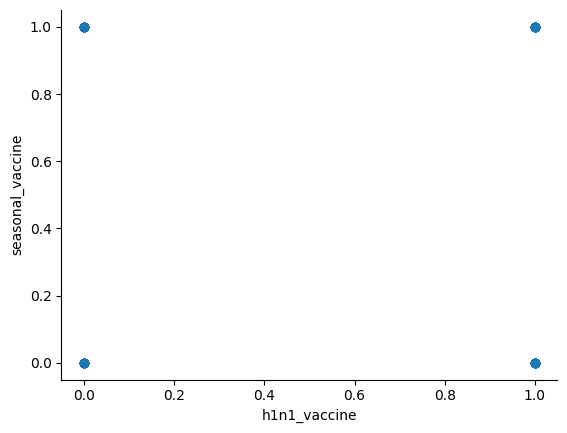

In [18]:
# @title h1n1_vaccine vs seasonal_vaccine

from matplotlib import pyplot as plt
labels_df.plot(kind='scatter', x='h1n1_vaccine', y='seasonal_vaccine', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

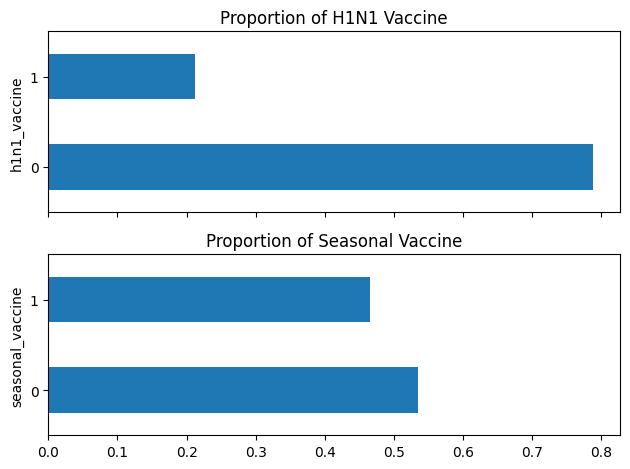

In [21]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels_df.shape[0]

(labels_df['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(labels_df['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

In [22]:
pd.crosstab(
    labels_df["h1n1_vaccine"],
    labels_df["seasonal_vaccine"],
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [23]:
# Phi Coefficient is the same as Pearson for two binary variables
(labels_df["h1n1_vaccine"]
     .corr(labels_df["seasonal_vaccine"], method="pearson")
)

0.37714265306144495

In [24]:
joined_df = features_df.join(labels_df)
print(joined_df.shape)
joined_df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [25]:
counts = (joined_df[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


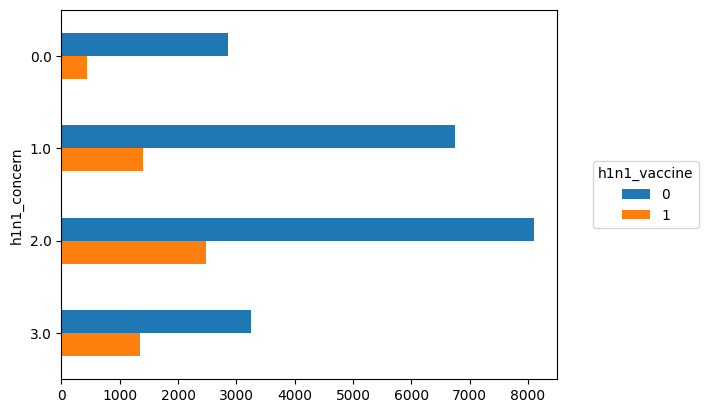

In [26]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right',
    bbox_to_anchor=(1.3, 0.5),
    title='h1n1_vaccine'
)

In [27]:
h1n1_concern_counts = counts.sum(axis='columns')
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [28]:
props = counts.div(h1n1_concern_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


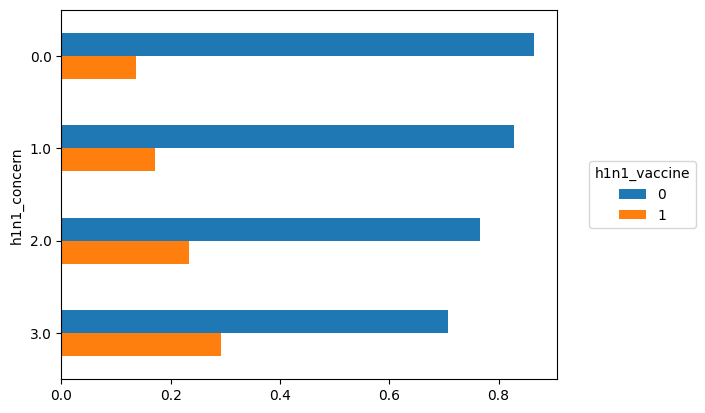

In [29]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

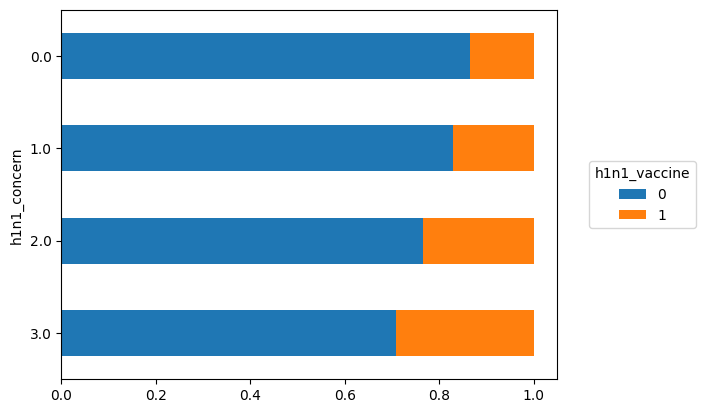

In [30]:
ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

In [31]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against
    `col`.

    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes
            object to attach plot to
    """
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

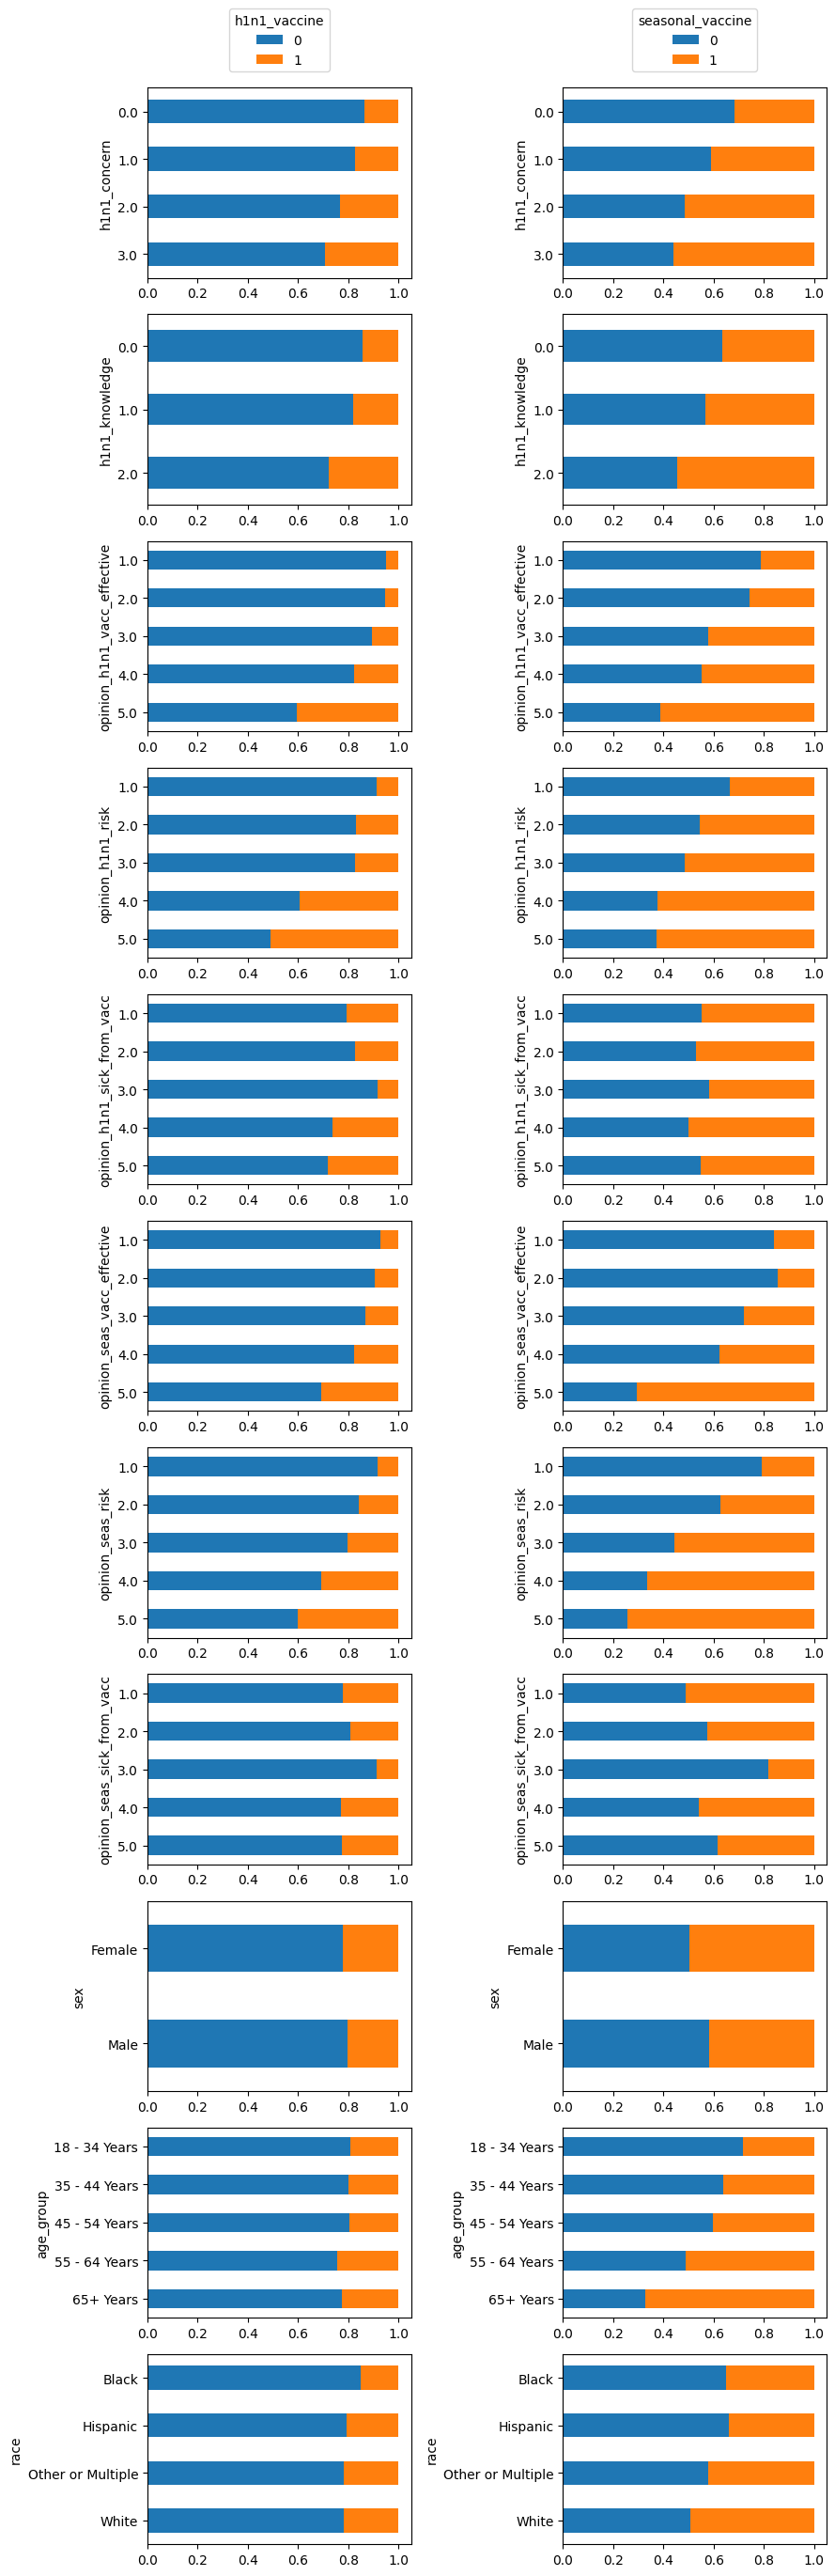

In [32]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )

ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 6    # Set a random seed for reproducibility!

In [34]:
features_df.dtypes != "object"

h1n1_concern                    True
h1n1_knowledge                  True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_h1n1                True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_h1n1_vacc_effective     True
opinion_h1n1_risk               True
opinion_h1n1_sick_from_vacc     True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                      False
race                           False
sex                            False
income_poverty                 False
marital_status                 False
r

In [35]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


In [36]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

In [37]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1)
)

In [38]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [39]:
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'], dtype=object))])),
                ('estimators',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1)))])

In [40]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

In [41]:
%%time

# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline.predict_proba(X_eval)
preds

CPU times: user 240 ms, sys: 83.2 ms, total: 323 ms
Wall time: 319 ms


[array([[0.70898963, 0.29101037],
        [0.9022304 , 0.0977696 ],
        [0.84459811, 0.15540189],
        ...,
        [0.92338263, 0.07661737],
        [0.89632521, 0.10367479],
        [0.92787943, 0.07212057]]),
 array([[0.52721977, 0.47278023],
        [0.61838467, 0.38161533],
        [0.37024394, 0.62975606],
        ...,
        [0.85936904, 0.14063096],
        [0.77843342, 0.22156658],
        [0.15115096, 0.84884904]])]

In [42]:
print("test_probas[0].shape", preds[0].shape)
print("test_probas[1].shape", preds[1].shape)

test_probas[0].shape (8814, 2)
test_probas[1].shape (8814, 2)


In [43]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.291010,0.472780
16516,0.097770,0.381615
3106,0.155402,0.629756
16981,0.661791,0.857876
19111,0.284478,0.776927


from matplotlib import pyplot as plt
_df_0['h1n1_vaccine'].plot(kind='hist', bins=20, title='h1n1_vaccine')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['seasonal_vaccine'].plot(kind='hist', bins=20, title='seasonal_vaccine')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='h1n1_vaccine', y='seasonal_vaccine', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['h1n1_vaccine'].plot(kind='line', figsize=(8, 4), title='h1n1_vaccine')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['seasonal_vaccine'].plot(kind='line', figsize=(8, 4), title='seasonal_vaccine')
plt.gca().spines[['top', 'right']].set_visible(False)

In [44]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

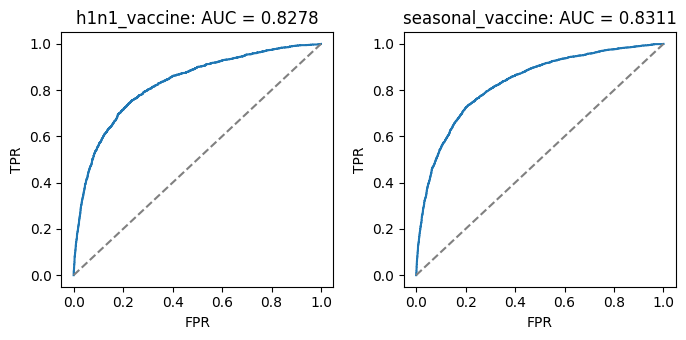

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()


In [46]:
roc_auc_score(y_eval, y_preds)

0.8294712007285718

In [47]:
%%time

full_pipeline.fit(features_df, labels_df)

None   # So we don't print out the whole pipeline representation

CPU times: user 209 ms, sys: 73.9 ms, total: 283 ms
Wall time: 197 ms


In [51]:
test_features_df = pd.read_csv("/content/training_set_features.csv",
                               index_col="respondent_id")

In [52]:
test_probas = full_pipeline.predict_proba(test_features_df)
test_probas

[array([[0.97309876, 0.02690124],
        [0.74578421, 0.25421579],
        [0.9581527 , 0.0418473 ],
        ...,
        [0.72668344, 0.27331656],
        [0.97669472, 0.02330528],
        [0.8682307 , 0.1317693 ]]),
 array([[0.93893564, 0.06106436],
        [0.75155734, 0.24844266],
        [0.80939609, 0.19060391],
        ...,
        [0.25020457, 0.74979543],
        [0.97262432, 0.02737568],
        [0.7439704 , 0.2560296 ]])]

In [53]:
submission_df = pd.read_csv("/content/submission_format.csv",
                            index_col="respondent_id")

In [54]:
submission_df.head()


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['h1n1_vaccine']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'h1n1_vaccine'}, axis=1)
              .sort_values('h1n1_vaccine', ascending=True))
  xs = counted['h1n1_vaccine']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('h1n1_vaccine', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('h1n1_vaccine')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['seasonal_vaccine']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'seasonal_vaccine'}, axis=1)
              .sort_values('seasonal_vaccine', ascending=True))
  xs = counted['seasonal_vaccine']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('seasonal_vaccine', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('seasonal_vaccine')
_ = plt.ylabel('count()')

In [60]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features_df.index.values,
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = test_probas[0][:, 1]
submission_df["seasonal_vaccine"] = test_probas[1][:, 1]

submission_df.head()

AssertionError: 
Arrays are not equal

Mismatched elements: 26707 / 26707 (100%)
Max absolute difference: 26707
Max relative difference: 1.
 x: array([    0,     1,     2, ..., 26704, 26705, 26706])
 y: array([26707, 26708, 26709, ..., 53411, 53412, 53413])

In [56]:
print(test_features_df.shape)
print(submission_df.shape)

(26707, 35)
(26708, 2)


In [57]:
print(test_features_df.index.values)
print(submission_df.index.values)

[    0     1     2 ... 26704 26705 26706]
[26707 26708 26709 ... 53412 53413 53414]


In [58]:
submission_df = submission_df.iloc[:-1]

In [59]:
print(test_features_df.shape)
print(submission_df.shape)

print(test_features_df.index.values)
print(submission_df.index.values)

(26707, 35)
(26707, 2)
[    0     1     2 ... 26704 26705 26706]
[26707 26708 26709 ... 53411 53412 53413]


In [61]:
print(test_features_df.index.values)
print(submission_df.index.values)

[    0     1     2 ... 26704 26705 26706]
[26707 26708 26709 ... 53411 53412 53413]


In [62]:
print(test_features_df.isnull().sum())
print(submission_df.isnull().sum())

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [63]:
print(test_features_df.dtypes)
print(submission_df.dtypes)

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [64]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

test_features_df = pd.DataFrame(imputer.fit_transform(test_features_df), columns=test_features_df.columns)
submission_df = pd.DataFrame(imputer.fit_transform(submission_df), columns=submission_df.columns)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: '55 - 64 Years'

In [65]:
non_numeric_cols = test_features_df.select_dtypes(include=["object"]).columns.tolist()

In [66]:
imputer = SimpleImputer(strategy="most_frequent")
test_features_df[non_numeric_cols] = imputer.fit_transform(test_features_df[non_numeric_cols])

In [67]:
submission_df.dtypes
non_numeric_cols = submission_df.select_dtypes(include=["object"]).columns.tolist()
# Handle non-numeric columns in submission_df

In [68]:
imputer.fit(train_features_df)
test_features_df = pd.DataFrame(imputer.transform(test_features_df), columns=test_features_df.columns)
submission_df = pd.DataFrame(imputer.transform(submission_df), columns=submission_df.columns)

NameError: name 'train_features_df' is not defined

In [69]:
%%time

# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline.predict_proba(X_eval)

# Print the predicted probabilities
print(preds)

# Print the shape of the predictions
print(preds.shape)

# Print the number of positive predictions
print((preds[:, 1] > 0.5).sum())

[array([[0.70898963, 0.29101037],
       [0.9022304 , 0.0977696 ],
       [0.84459811, 0.15540189],
       ...,
       [0.92338263, 0.07661737],
       [0.89632521, 0.10367479],
       [0.92787943, 0.07212057]]), array([[0.52721977, 0.47278023],
       [0.61838467, 0.38161533],
       [0.37024394, 0.62975606],
       ...,
       [0.85936904, 0.14063096],
       [0.77843342, 0.22156658],
       [0.15115096, 0.84884904]])]


AttributeError: 'list' object has no attribute 'shape'

In [70]:
print(type(preds))

<class 'list'>


In [71]:
print(preds[0].shape)

(8814, 2)


In [72]:
print(preds[0])

[[0.70898963 0.29101037]
 [0.9022304  0.0977696 ]
 [0.84459811 0.15540189]
 ...
 [0.92338263 0.07661737]
 [0.89632521 0.10367479]
 [0.92787943 0.07212057]]


In [73]:
num_positive_preds = 0
for pred in preds:
    num_positive_preds += (pred[:, 1] > 0.5).sum()
print(num_positive_preds)

5017


In [74]:
%%time

# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline.predict_proba(X_eval)

# Print the first prediction
print(preds[0])

# Print the shape of the first prediction
print(preds[0].shape)

# Print the number of positive predictions in the first prediction
print((preds[0][:, 1] > 0.5).sum())

# Print the number of positive predictions for all predictions
num_positive_preds = 0
for pred in preds:
    num_positive_preds += (pred[:, 1] > 0.5).sum()
print(num_positive_preds)

[[0.70898963 0.29101037]
 [0.9022304  0.0977696 ]
 [0.84459811 0.15540189]
 ...
 [0.92338263 0.07661737]
 [0.89632521 0.10367479]
 [0.92787943 0.07212057]]
(8814, 2)
1196
5017
CPU times: user 210 ms, sys: 97 ms, total: 307 ms
Wall time: 281 ms


In [75]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.291010,0.472780
16516,0.097770,0.381615
3106,0.155402,0.629756
16981,0.661791,0.857876
19111,0.284478,0.776927


In [76]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

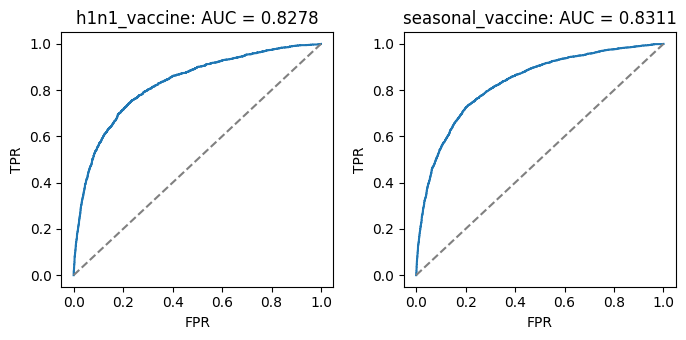

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [78]:
roc_auc_score(y_eval, y_preds)

0.8294712007285718

In [79]:
%%time

full_pipeline.fit(features_df, labels_df)

None   # So we don't print out the whole pipeline representation

CPU times: user 270 ms, sys: 73.7 ms, total: 344 ms
Wall time: 477 ms


In [80]:
test_features_df = pd.read_csv("/content/training_set_features.csv",
                               index_col="respondent_id")


In [81]:
test_probas = full_pipeline.predict_proba(test_features_df)
test_probas

[array([[0.97309876, 0.02690124],
        [0.74578421, 0.25421579],
        [0.9581527 , 0.0418473 ],
        ...,
        [0.72668344, 0.27331656],
        [0.97669472, 0.02330528],
        [0.8682307 , 0.1317693 ]]),
 array([[0.93893564, 0.06106436],
        [0.75155734, 0.24844266],
        [0.80939609, 0.19060391],
        ...,
        [0.25020457, 0.74979543],
        [0.97262432, 0.02737568],
        [0.7439704 , 0.2560296 ]])]

In [82]:
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


In [84]:
np.testing.assert_array_equal(test_features_df.index.values,
                              submission_df.index.values)

AssertionError: 
Arrays are not equal

Mismatched elements: 26707 / 26707 (100%)
Max absolute difference: 26707
Max relative difference: 1.
 x: array([    0,     1,     2, ..., 26704, 26705, 26706])
 y: array([26707, 26708, 26709, ..., 53411, 53412, 53413])

In [85]:
print(test_features_df.shape)
print(submission_df.shape)

(26707, 35)
(26707, 2)


In [86]:
print(test_features_df.index.min(), test_features_df.index.max())
print(submission_df.index.min(), submission_df.index.max())

0 26706
26707 53413


In [87]:
diff_indices = set(test_features_df.index) - set(submission_df.index)
print(len(diff_indices))

26707


In [89]:
# Reindex submission_df to match test_features_df
submission_df = submission_df.reindex(test_features_df.index)

# Drop the extra columns from submission_df
submission_df.drop(columns=['seasonal_vaccine', 'h1n1_vaccine'], inplace=True)

# Replace the 0.5s and 0.7s with the predicted probabilities
submission_df["seasonal_vaccine"] = predicted_seasonal_vaccine_probs
submission_df["h1n1_vaccine"] = predicted_h1n1_vaccine_probs

# Check the head of the submission_df
print(submission_df.head())

KeyError: "['seasonal_vaccine', 'h1n1_vaccine'] not found in axis"

In [90]:
print(submission_df.columns)

Index([], dtype='object')


In [91]:
import pandas as pd

# Read the CSV file into a DataFrame
submission_df = pd.read_csv("/content/submission_format.csv")

# Print the DataFrame
print(submission_df)

       respondent_id  h1n1_vaccine  seasonal_vaccine
0              26707           0.5               0.7
1              26708           0.5               0.7
2              26709           0.5               0.7
3              26710           0.5               0.7
4              26711           0.5               0.7
...              ...           ...               ...
26703          53410           0.5               0.7
26704          53411           0.5               0.7
26705          53412           0.5               0.7
26706          53413           0.5               0.7
26707          53414           0.5               0.7

[26708 rows x 3 columns]


In [92]:
# Print the first few rows of the DataFrame
print(submission_df.head())

# Print the summary of the DataFrame
print(submission_df.info())

   respondent_id  h1n1_vaccine  seasonal_vaccine
0          26707           0.5               0.7
1          26708           0.5               0.7
2          26709           0.5               0.7
3          26710           0.5               0.7
4          26711           0.5               0.7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   respondent_id     26708 non-null  int64  
 1   h1n1_vaccine      26708 non-null  float64
 2   seasonal_vaccine  26708 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 626.1 KB
None


In [94]:
# Replace missing values with a specific value
submission_df['seasonal_vaccine'].fillna(0.5, inplace=True)

# Apply a function to each element of a column
submission_df['h1n1_vaccine'] = submission_df['h1n1_vaccine'].apply(lambda x: x * 2)

In [95]:
# Save the DataFrame to a CSV file
submission_df.to_csv('submission_modified.csv', index=False)

In [96]:
# Calculate the mean and standard deviation of the seasonal_vaccine column
mean = submission_df['seasonal_vaccine'].mean()
std = submission_df['seasonal_vaccine'].std()

In [98]:
# Reindex submission_df to match test_features_df
submission_df = submission_df.reindex(test_features_df.index)

# Drop the extra columns from submission_df
submission_df.drop(columns=['seasonal_concern', 'h1n1_concern'], inplace=True)

# Replace the 0.5s and 0.7s with the predicted probabilities
submission_df["seasonal_vaccine"] = predicted_seasonal_vaccine_probs
submission_df["h1n1_vaccine"] = predicted_h1n1_vaccine_probs

# Check the head of the submission_df
print(submission_df.head())

KeyError: "['seasonal_concern', 'h1n1_concern'] not found in axis"

In [99]:
print(submission_df.columns)

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')


In [100]:
print(test_features_df.columns)

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')


In [104]:
# prompt: First, make sure we have the rows in the same order by comparing the indices. if not write code to fix this

import numpy as np
np.testing.assert_array_equal(test_features_df.index.values, submission_df.index.values)


In [105]:
# prompt: we can drop in the appropriate columns from our predicted probabilities.

import pandas as pd
submission_df = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)


In [106]:
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.291010,0.472780
16516,0.097770,0.381615
3106,0.155402,0.629756
16981,0.661791,0.857876
19111,0.284478,0.776927


In [108]:
submission_df.to_csv('my_submission.csv', index=True)

In [109]:
!head my_submission.csv

respondent_id,h1n1_vaccine,seasonal_vaccine
6728,0.29101037030835253,0.47278023016922077
16516,0.09776960411927084,0.38161533257839025
3106,0.15540188767993965,0.6297560585790997
16981,0.6617910997313109,0.8578756390894277
19111,0.284477942107959,0.7769272551532987
20305,0.04337120621735216,0.2734202968447803
21221,0.5536261008143785,0.736158711706888
6638,0.22623798502870315,0.5631017997974576
26652,0.03200093449597789,0.5723876678973997


In [110]:
# prompt: how many people would affect h1ni virus

print(num_positive_preds)


5017


In [113]:
# prompt: my submission score

submission_df.to_csv("/content/my_submission.csv", index=False)
!kaggle competitions submit -c influenza-vaccine-effectiveness -f my_submission.csv -m "My submission"


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


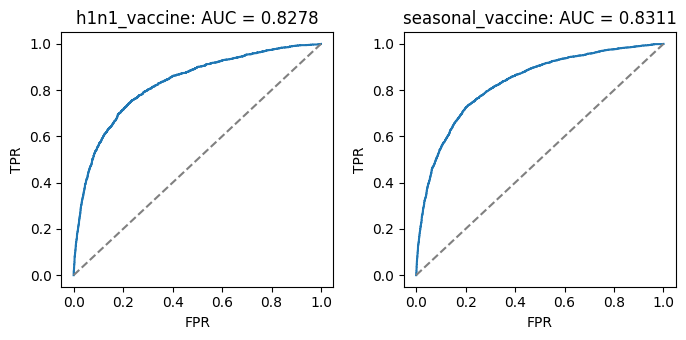

In [114]:
# prompt: show all graphs and prediction throgh graph

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()
